**NTSB Aviation Accident Data Exploratory Analysis**

In [1]:
#First import all the libraries necessary for analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the file from the local system location
df = pd.read_csv("D:/AviationData/AviationData.csv",encoding = 'ISO-8859-1',low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


**STATISTICAL SUMMARY**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Accident.Number         87282 non-null  object 
 3   Event.Date              87282 non-null  object 
 4   Location                87230 non-null  object 
 5   Country                 87056 non-null  object 
 6   Latitude                33073 non-null  object 
 7   Longitude               33064 non-null  object 
 8   Airport.Code            49322 non-null  object 
 9   Airport.Name            51955 non-null  object 
 10  Injury.Severity         86399 non-null  object 
 11  Aircraft.damage         84272 non-null  object 
 12  Aircraft.Category       30783 non-null  object 
 13  Registration.Number     85965 non-null  object 
 14  Make                    87219 non-null

In [5]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,81533.000000,75881.000000,74772.000000,75349.000000,81370.000000
mean,1.147131,0.652772,0.280921,0.360814,5.311847
std,0.447085,5.521338,1.557476,2.257721,27.899156
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
df.describe(include=object)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,87282,87282,87282,87282,87230,87056,33073,33064,49322,51955,...,87180,81391,30458,12330,81493,15971,83304,61724,82070,73629
unique,86370,2,87282,14435,27171,210,24749,26204,10253,24546,...,4,11,31,3,28,13079,4,12,16667,2686
top,20001212X19172,Accident,WPR16LA187,2000-07-08,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,83536,1,25,434,80998,19,22,1486,232,...,58165,69159,17131,4284,48655,246,76251,15428,61754,17019


**DATA CLEANING**

* Drop columns with over 50% missing values
* Drop records of Accidents not in United States
* Convert Date to a datetime, add a Year & Month column
* Remove data before 1982
* Merge same airport names together
* Merge same registration numbers together
* Merge different capitalizations of Make together
* Transform "Amateur Built" column to boolean
* Split location to city and state
* Remove amount of injuries as this is already in another column
* Merge weather condition- UNK & unk to unknowns

In [7]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54209
Longitude                 54218
Airport.Code              37960
Airport.Name              35327
Injury.Severity             883
Aircraft.damage            3010
Aircraft.Category         56499
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          5749
Engine.Type                5891
FAR.Description           56824
Schedule                  74952
Purpose.of.flight          5789
Air.carrier               71311
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          3978
Broad.phase.of.flight     25558
Report.Status              5212
Publication.Date          13653
dtype: i

In [8]:
df.duplicated().sum()

0

In [9]:
print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [10]:
# Calculate the percentage of values being NaN for each column
rows = len(df)
missing = df.isna().sum()
percentage_missing = missing / rows

In [11]:
# Put the data in a DataFrame and sort it
percentage_missing_df = pd.DataFrame({'Missing' : percentage_missing})
percentage_missing_df.sort_values('Missing', ascending = False, inplace = True)

In [12]:
# Printing columns with more than 10% missing values
print(percentage_missing_df[percentage_missing_df['Missing'] > 0.1])

                         Missing
Schedule                0.858734
Air.carrier             0.817018
FAR.Description         0.651039
Aircraft.Category       0.647316
Longitude               0.621182
Latitude                0.621079
Airport.Code            0.434912
Airport.Name            0.404746
Broad.phase.of.flight   0.292821
Publication.Date        0.156424
Total.Serious.Injuries  0.143329
Total.Minor.Injuries    0.136718
Total.Fatal.Injuries    0.130623


In [13]:
# Drop columns with over 50% missing values
cols_to_drop = list(percentage_missing_df[percentage_missing_df['Missing'] > 0.5].index)
df.drop(columns = cols_to_drop, axis = 1, inplace = True)
print(cols_to_drop)

['Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category', 'Longitude', 'Latitude']


In [14]:
# Drop the records of Accidents not in United States
before = len(df)
df = df[(df['Investigation.Type'] == 'Accident') & (df['Country'] == 'United States')]
dropped = before - len(df)
print(str(dropped) + ' rows dropped.')

8613 rows dropped.


In [15]:
# Convert Date to a datetime, add a Year & Month column and remove data before 1982
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78669 entries, 0 to 87280
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                78669 non-null  object        
 1   Investigation.Type      78669 non-null  object        
 2   Accident.Number         78669 non-null  object        
 3   Event.Date              78669 non-null  datetime64[ns]
 4   Location                78658 non-null  object        
 5   Country                 78669 non-null  object        
 6   Airport.Code            46704 non-null  object        
 7   Airport.Name            49214 non-null  object        
 8   Injury.Severity         78630 non-null  object        
 9   Aircraft.damage         77599 non-null  object        
 10  Registration.Number     78666 non-null  object        
 11  Make                    78657 non-null  object        
 12  Model                   78640 non-null  object

In [16]:
#Add a day, month & year column
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Name.Abbr'] = df['Event.Date'].dt.day_name().str[:3]

# Add a weekend column
df.loc[(df['Day.Name.Abbr'] == 'Sat') | (df['Day.Name.Abbr'] == 'Sun'), 'Weekend'] = True
df.loc[(df['Day.Name.Abbr'] != 'Sat') & (df['Day.Name.Abbr'] != 'Sun'), 'Weekend'] = False

# Remove data before 1982
df = df[df['Year'] >= 1982]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78662 entries, 7 to 87280
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                78662 non-null  object        
 1   Investigation.Type      78662 non-null  object        
 2   Accident.Number         78662 non-null  object        
 3   Event.Date              78662 non-null  datetime64[ns]
 4   Location                78651 non-null  object        
 5   Country                 78662 non-null  object        
 6   Airport.Code            46704 non-null  object        
 7   Airport.Name            49214 non-null  object        
 8   Injury.Severity         78623 non-null  object        
 9   Aircraft.damage         77592 non-null  object        
 10  Registration.Number     78659 non-null  object        
 11  Make                    78650 non-null  object        
 12  Model                   78633 non-null  object

In [18]:
# Merge same airport names together
df['Airport.Name'].replace(to_replace = '(?i)^.*private.*$', value = 'PRIVATE', inplace = True, regex = True)
df['Airport.Name'].replace(to_replace = '(?i)none', value = 'NONE', inplace = True, regex = True)
df['Airport.Name'].value_counts().nlargest(10)

PRIVATE          1193
NONE              223
MERRILL FIELD      83
VAN NUYS           79
MUNICIPAL          75
CENTENNIAL         74
UNKNOWN            68
CHINO              53
BIRCHWOOD          49
SEDONA             47
Name: Airport.Name, dtype: int64

In [19]:
# Merge same registration numbers together
df['Registration.Number'].replace(to_replace = '(?i)none', value = 'NONE', inplace = True, regex = True)
df['Registration.Number'].value_counts().nlargest(10)

NONE      406
UNREG     111
N20752      7
N5408Y      6
N11VH       6
N53893      6
N121CC      6
N8402K      6
N4101E      6
N3125N      5
Name: Registration.Number, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78662 entries, 7 to 87280
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                78662 non-null  object        
 1   Investigation.Type      78662 non-null  object        
 2   Accident.Number         78662 non-null  object        
 3   Event.Date              78662 non-null  datetime64[ns]
 4   Location                78651 non-null  object        
 5   Country                 78662 non-null  object        
 6   Airport.Code            46704 non-null  object        
 7   Airport.Name            49214 non-null  object        
 8   Injury.Severity         78623 non-null  object        
 9   Aircraft.damage         77592 non-null  object        
 10  Registration.Number     78659 non-null  object        
 11  Make                    78650 non-null  object        
 12  Model                   78633 non-null  object

In [21]:
# Merge different capitalizations of Make together
df['Make'] = df['Make'].str.title()
df['Make'].value_counts().nlargest(10)

Cessna      25264
Piper       13825
Beech        4838
Bell         2204
Mooney       1254
Grumman      1129
Bellanca     1028
Robinson      915
Boeing        911
Hughes        863
Name: Make, dtype: int64

In [22]:
# Transform Amateur Built to boolean
df['Amateur.Built'].replace(to_replace = ['Yes', 'Y'], value = True, inplace = True, regex = False)
df['Amateur.Built'].replace(to_replace = ['No', 'N'], value = False, inplace = True, regex = False)
df['Amateur.Built'].value_counts()

False    70471
True      8176
Name: Amateur.Built, dtype: int64

In [23]:
# Split location to city and state
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
df[['City', 'State']].head(10)

,City,State
7,PULLMAN,WA
8,EAST HANOVER,NJ
9,JACKSONVILLE,FL
10,HOBBS,NM
11,TUSKEGEE,AL
12,HOMER,LA
13,HEARNE,TX
14,CHICKASHA,OK
15,LITTLE ROCK,AR
16,MIDWAY,UT


In [24]:
# Remove amount of injuries as this is aleady in another column
df['Injury.Severity'] = df['Injury.Severity'].str.split('(').str[0]
df['Injury.Severity'].value_counts()

Non-Fatal      63793
Fatal          14815
Unavailable       15
Name: Injury.Severity, dtype: int64

In [25]:
# Merge weather condition of unknowns
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)
df['Weather.Condition'].value_counts()

VMC        72294
IMC         5355
Unknown      606
Name: Weather.Condition, dtype: int64

**DATA EXPLORATION**

* Amount of total and fatal accidents per year
* Calculate the total fatality rate
* Months with most accidents
* Days with most accidents
* Purpose of flight depending on the day
* At what stage do accidents happen
* Fatality rate based on weather condition
* Fatality rate based on Ametuer make
* Extracting list of 50 makes most frequently involved in accidents
* Correlation map
* Studying one location based on survival rate

In [26]:
# Dataframe with known injury condition
injury_data = df[df['Injury.Severity'] != 'Unavailable']

In [27]:
# Number of accidents per year
accidents_per_year = df.groupby(['Year'], as_index = False)['Event.Id'].count()
accidents_per_year

,Year,Event.Id
0,1982,3445
1,1983,3391
2,1984,3290
3,1985,2972
4,1986,2758
5,1987,2665
6,1988,2537
7,1989,2410
8,1990,2403
9,1991,2350


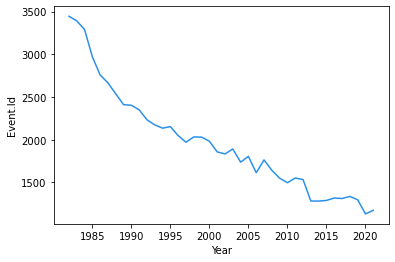

In [28]:
plot = sns.lineplot(x = 'Year', y = 'Event.Id', data = accidents_per_year, color = '#2990EA')

In [29]:
# Number of fatal accidents per year
fatal_accidents_per_year = df[df['Injury.Severity'] == 'Fatal'].groupby(['Year'], as_index = False)['Event.Id'].count()
fatal_accidents_per_year

,Year,Event.Id
0,1982,644
1,1983,654
2,1984,617
3,1985,558
4,1986,516
5,1987,489
6,1988,492
7,1989,479
8,1990,499
9,1991,478


<AxesSubplot:xlabel='Year', ylabel='Event.Id'>

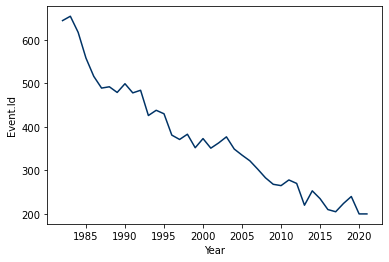

In [30]:
sns.lineplot(x = 'Year', y = 'Event.Id', data = fatal_accidents_per_year, color = '#003366')

In [31]:
# Calculate average fatality rate
averagefatal = len(injury_data[injury_data['Injury.Severity'] == 'Fatal'].index) / len(injury_data.index)
print("Average fatality rate: " + str(round(averagefatal * 100, 2)) + '%')

Average fatality rate: 18.84%


Yearly fatality rate decrease: 0.07%


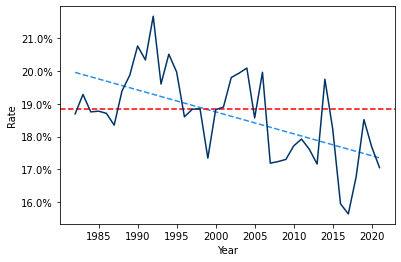

In [32]:
# Fatality rate per year
fatality_rate_per_year = pd.DataFrame()
fatality_rate_per_year['Rate'] = fatal_accidents_per_year['Event.Id'] / accidents_per_year['Event.Id']
fatality_rate_per_year['Year'] = accidents_per_year['Year']

# Trendline
z = np.polyfit(fatality_rate_per_year['Year'], fatality_rate_per_year['Rate'], 1)
print('Yearly fatality rate decrease: ' + str(-round(z[0]*100, 2)) + '%')
p = np.poly1d(z)
plt.plot(fatality_rate_per_year['Year'], p(fatality_rate_per_year['Year']), "--", color = '#2990EA')

# Line with average fatality
plt.axhline(y = averagefatal, color = 'r', linestyle = '--')

# Plot
sns.lineplot(x = 'Year', y = 'Rate', data = fatality_rate_per_year, color = '#003366')
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Number of aviation accidents per month')]

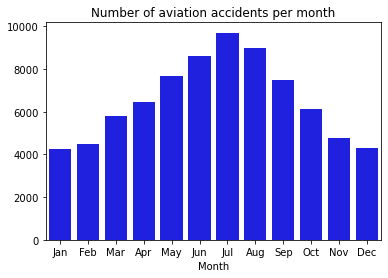

In [33]:
# Months with the most accidents
plot = sns.countplot(x = 'Month.Abbr', color = 'b', data = df)
plot.set(xlabel = 'Month', ylabel = None, title = 'Number of aviation accidents per month')

[Text(0.5, 0, 'day'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Number of aviation accidents per day of the week')]

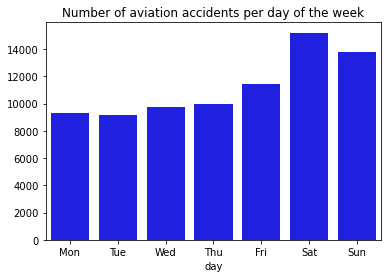

In [34]:
# Days with the most accidents
plot = sns.countplot(x = 'Day.Name.Abbr', order = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], color = 'b', data = df)
plot.set(xlabel = 'day', ylabel = None, title = 'Number of aviation accidents per day of the week')

In [35]:
# Remove data with unknown purpose of flight
purpose_data = df[df['Purpose.of.flight'] != 'Unknown']

In [36]:
# Calculate relative importance of purpose depending on weekend
weekday_accidents = len(purpose_data[purpose_data['Weekend'] == False])
weekday_data = purpose_data[purpose_data['Weekend'] == False]['Purpose.of.flight'].value_counts() / weekday_accidents

weekend_accidents = len(purpose_data[purpose_data['Weekend'] == True])
weekend_data = purpose_data[purpose_data['Weekend'] == True]['Purpose.of.flight'].value_counts() / weekend_accidents

In [37]:
# Merge data together
purpose_day_data = pd.merge(weekday_data, weekend_data, left_index=True, right_index=True)

In [38]:
# Rename columns and only keep top 5 purposes
purpose_day_data.reset_index(inplace = True)
purpose_day_data.rename(columns={'index': 'Purpose', 'Purpose.of.flight_x': 'Weekday', 'Purpose.of.flight_y': 'Weekend'}, inplace=True)
purpose_day_data = purpose_day_data.iloc[:5] 

In [39]:
# Melt the data so it can be used in a Seaborn plot
melted_pdd = purpose_day_data.melt('Purpose', var_name='day', value_name='percentage')

melt() function is useful to message a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.

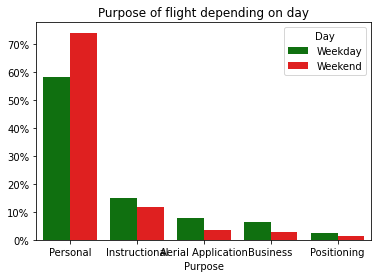

In [40]:
# Plot the data
ax = sns.barplot(x='Purpose', y='percentage', hue='day', data = melted_pdd, palette = ['g','r'])
ax.set(ylabel = None, title = 'Purpose of flight depending on day')
plt.legend(title = "Day")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

[Text(0, 0, 'Landing'),
 Text(1, 0, 'Takeoff'),
 Text(2, 0, 'Cruise'),
 Text(3, 0, 'Maneuvering'),
 Text(4, 0, 'Approach'),
 Text(5, 0, 'Climb'),
 Text(6, 0, 'Taxi'),
 Text(7, 0, 'Descent'),
 Text(8, 0, 'Go-around'),
 Text(9, 0, 'Standing')]

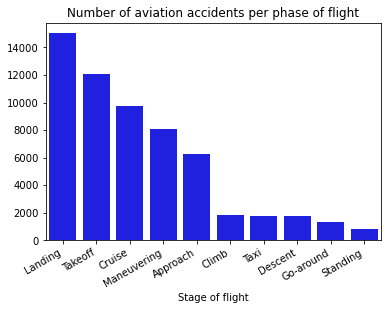

In [41]:
# At what stage do accidents happen
stage_of_flight_data = df[(df['Broad.phase.of.flight'] != 'Unknown') & (df['Broad.phase.of.flight'] != 'Other')]
plot = sns.countplot(x = 'Broad.phase.of.flight', order = stage_of_flight_data['Broad.phase.of.flight'].value_counts().index, color = 'b', data = stage_of_flight_data)
plot.set(xlabel = 'Stage of flight', ylabel = None, title = 'Number of aviation accidents per phase of flight')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30, ha = 'right')

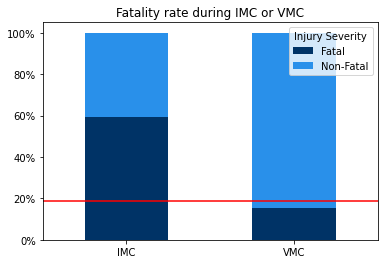

In [42]:
# Remove data without weather condition and injury severity
weather_data = injury_data[injury_data['Weather.Condition'] != 'Unknown']

# Stacked relative frequencies of accidents happening during certain weather conditions
weather_data.groupby('Weather.Condition')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity').plot.bar(stacked = True, color = ['#003366','#2990EA'])

# Line with average fatality
plt.axhline(y = averagefatal, color = 'r', linestyle = '-')

#Formatting
plt.xticks(rotation = 0)
plt.title('Fatality rate during IMC or VMC')
plt.xlabel('')
plt.legend(title = "Injury Severity", loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

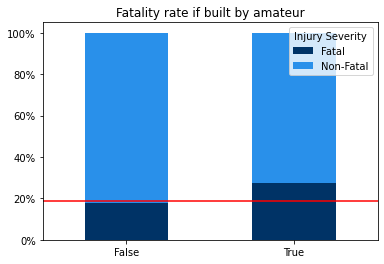

In [43]:
# Stacked relative frequencies of accidents according to amateur built
injury_data.groupby('Amateur.Built')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity').plot.bar(stacked = True, color = ['#003366','#2990EA'])

# Line with average fatality
plt.axhline(y = averagefatal, color = 'r', linestyle = '-')

#Formatting
plt.xticks(rotation = 0)
plt.title('Fatality rate if built by amateur')
plt.xlabel('')
plt.legend(title = "Injury Severity", loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

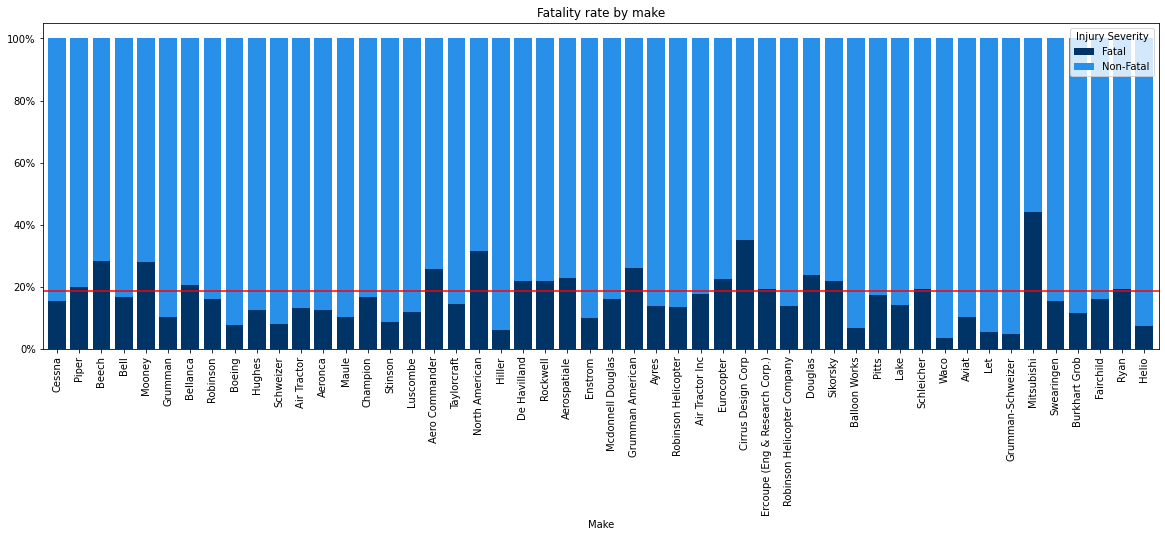

In [44]:
# Extract list of 50 makes most frequently involved in accidents
make_top50 = df['Make'].value_counts().nlargest(50).index.tolist()

# Only keep data with a make in the top list
make_data = injury_data[injury_data['Make'].isin(make_top50)]

# Percentage fatality by make
makefatal = make_data.groupby('Make')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity').reindex(make_top50)
makefatal.plot.bar(stacked = True, figsize=(20,6), width = 0.8, color = ['#003366','#2990EA'])

# Line with average fatality
plt.axhline(y = averagefatal, color = 'r', linestyle = '-')

#Formatting
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Fatality rate by make')
plt.legend(title = "Injury Severity", loc='upper right')
plt.show()

**ADD NEW COLUMN FOR SURVIVAL RATE & STUDYING INDIVIDUAL CITY**

Survival rate formula: ( Serious + not serious) / ( Total passenger count) x 100

In [45]:
df['Survival Rate'] = (df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df["Total.Uninjured"])/(df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df["Total.Uninjured"])

df['Survival Rate'].dropna()
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State,Survival Rate
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,...,Takeoff,Probable Cause,01-01-1982,1982,Jan,Fri,False,PULLMAN,WA,1.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,...,Landing,Probable Cause,01-01-1982,1982,Jan,Fri,False,EAST HANOVER,NJ,1.0
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,...,Cruise,Probable Cause,01-01-1982,1982,Jan,Fri,False,JACKSONVILLE,FL,1.0
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,Non-Fatal,Substantial,...,Approach,Probable Cause,01-01-1982,1982,Jan,Fri,False,HOBBS,NM,1.0
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,TUSKEGEE,Non-Fatal,Substantial,...,Landing,Probable Cause,01-01-1982,1982,Jan,Fri,False,TUSKEGEE,AL,1.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78662 entries, 7 to 87280
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                78662 non-null  object        
 1   Investigation.Type      78662 non-null  object        
 2   Accident.Number         78662 non-null  object        
 3   Event.Date              78662 non-null  datetime64[ns]
 4   Location                78651 non-null  object        
 5   Country                 78662 non-null  object        
 6   Airport.Code            46704 non-null  object        
 7   Airport.Name            49214 non-null  object        
 8   Injury.Severity         78623 non-null  object        
 9   Aircraft.damage         77592 non-null  object        
 10  Registration.Number     78659 non-null  object        
 11  Make                    78650 non-null  object        
 12  Model                   78633 non-null  object

In [47]:
## Removing the airport count <100

# Create some example data
df1 = pd.DataFrame(df)

# Get the count of each value
value_counts = df['Location'].value_counts()

# Select the values where the count is less than 50
to_remove = value_counts[value_counts <= 100].index

# Keep rows where the city column is not in to_remove
df = df1[~df1.Location.isin(to_remove)]

pd.DataFrame(df["Location"].value_counts())

,Location
"ANCHORAGE, AK",405
"ALBUQUERQUE, NM",192
"HOUSTON, TX",174
"FAIRBANKS, AK",169
"MIAMI, FL",158
"TUCSON, AZ",141
"PHOENIX, AZ",131
"ENGLEWOOD, CO",130
"ORLANDO, FL",117
"SAN DIEGO, CA",117


<Figure size 1008x1584 with 0 Axes>

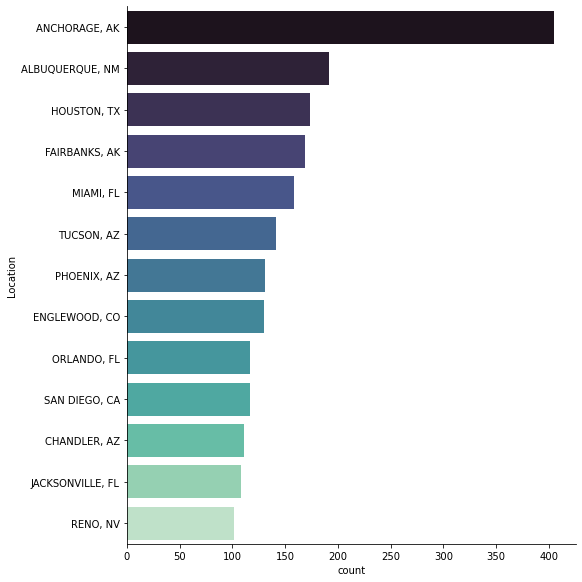

In [48]:
#Exploratory data visualisation
f = plt.figure(figsize=(14, 22))
sns.catplot(y ='Location',data=df , kind= "count",palette="mako",
           order = df["Location"].value_counts().index, height = 8)

In [49]:
#Anchorage seems to have very high rate of accident, let's dive deeper into each factors
ak= df[df["Location"].str.contains("ANCHORAGE, AK") == True]
ak.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State,Survival Rate
105,20020917X01624,Accident,ANC82DA014,1982-01-17,"ANCHORAGE, AK",United States,MRI,MERRILL FIELD,Non-Fatal,Destroyed,...,Takeoff,Probable Cause,17-01-1983,1982,Jan,Sun,True,ANCHORAGE,AK,1.0
171,20020917X01652,Accident,ANC82FA017,1982-01-25,"ANCHORAGE, AK",United States,Z38,SKY HARBOR/O'MALLEY,Non-Fatal,Substantial,...,Descent,Probable Cause,25-01-1983,1982,Jan,Mon,False,ANCHORAGE,AK,1.0
484,20020917X01633,Accident,ANC82DA024,1982-03-05,"ANCHORAGE, AK",United States,MRI,MERRILL FIELD,Non-Fatal,Substantial,...,Landing,Probable Cause,05-03-1983,1982,Mar,Fri,False,ANCHORAGE,AK,1.0
701,20020917X01637,Accident,ANC82DA028,1982-03-27,"ANCHORAGE, AK",United States,MRI,MERRILL FIELD,Non-Fatal,Substantial,...,Landing,Probable Cause,27-03-1983,1982,Mar,Sat,True,ANCHORAGE,AK,1.0
1125,20020917X02677,Accident,ANC82DAG22,1982-05-08,"ANCHORAGE, AK",United States,IAP,ANCHORAGE,Non-Fatal,Substantial,...,Landing,Probable Cause,08-05-1983,1982,May,Sat,True,ANCHORAGE,AK,1.0
1525,20020917X02685,Accident,ANC82DAG31,1982-06-11,"ANCHORAGE, AK",United States,NaN,SAND LAKE,Non-Fatal,Substantial,...,Maneuvering,Probable Cause,11-06-1983,1982,Jun,Fri,False,ANCHORAGE,AK,1.0
2250,20020917X02658,Accident,ANC82DA066,1982-08-04,"ANCHORAGE, AK",United States,MRI,MERRILL FIELD,Non-Fatal,Substantial,...,Landing,Probable Cause,04-08-1983,1982,Aug,Wed,False,ANCHORAGE,AK,1.0
2405,20020917X02694,Accident,ANC82DAG41,1982-08-16,"ANCHORAGE, AK",United States,MRI,MERRILL,Non-Fatal,Substantial,...,Landing,Probable Cause,16-08-1983,1982,Aug,Mon,False,ANCHORAGE,AK,1.0
2608,20020917X04183,Accident,ANC82DA082,1982-09-01,"ANCHORAGE, AK",United States,NaN,UNIMPROVED AIRSTRIP,Non-Fatal,Substantial,...,Takeoff,Probable Cause,01-09-1983,1982,Sep,Wed,False,ANCHORAGE,AK,1.0
2776,20020917X04205,Accident,ANC82DAG55,1982-09-16,"ANCHORAGE, AK",United States,NaN,LAKE HOOD,Non-Fatal,Destroyed,...,Takeoff,Probable Cause,16-09-1983,1982,Sep,Thu,False,ANCHORAGE,AK,1.0


Anchorage is located in Alaska with extreme cold temperature and weather.

In [50]:
weather_data_ak = ak[ak['Weather.Condition'] != 'Unknown']

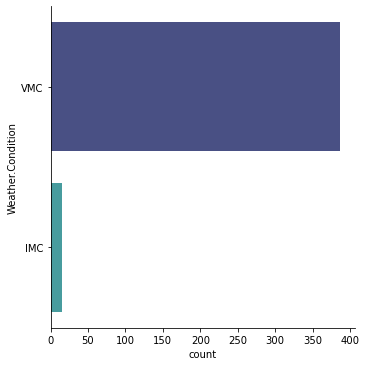

In [51]:
sns.catplot(y ="Weather.Condition",data=weather_data_ak , kind= "count", palette = 'mako')

In [52]:
factor_weather= weather_data_ak.groupby("Weather.Condition").sum().reset_index()
factor_weather

,Weather.Condition,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Survival Rate
0,IMC,38.0,4.0,10.0,10.0,919.0,29891,9.00
1,VMC,422.0,18.0,35.0,78.0,976.0,771206,308.65


<AxesSubplot:xlabel='Weather.Condition', ylabel='Survival Rate'>

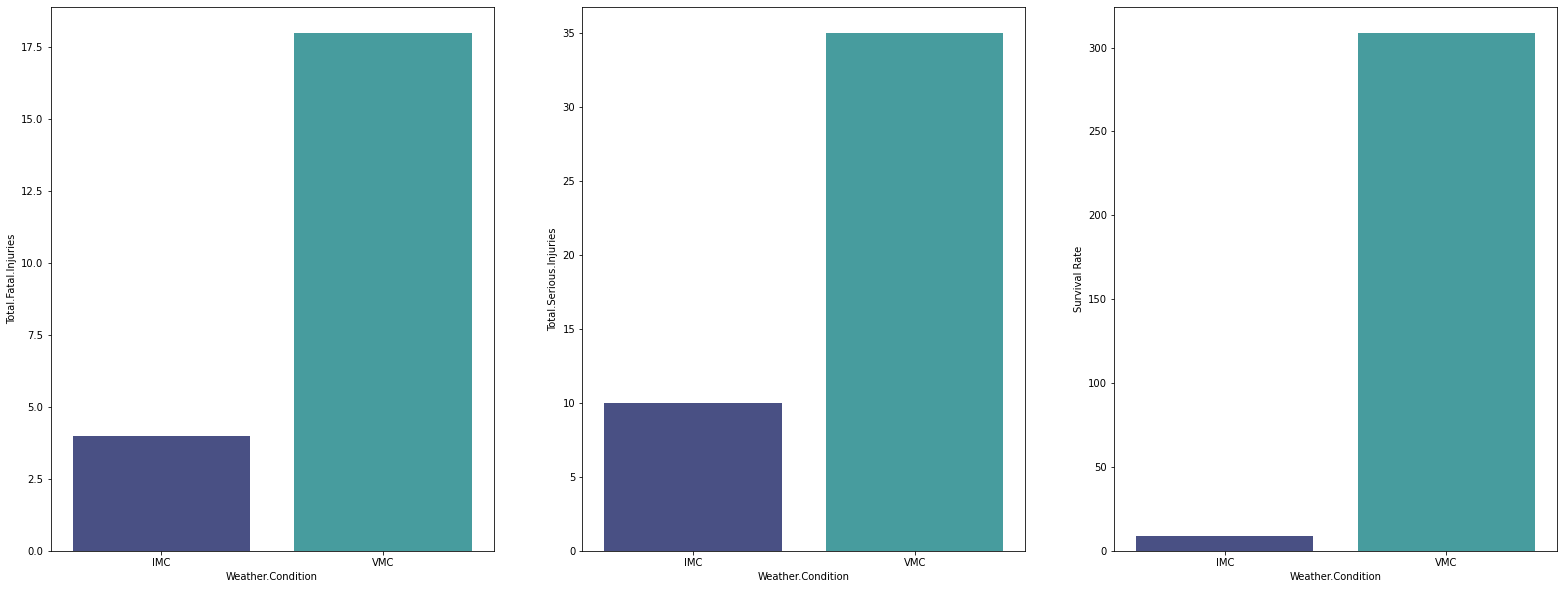

In [53]:
# Weather condition on fatalities and injury
f, axes=plt.subplots(1,3 , figsize= (27,10))
sns.barplot(x = 'Weather.Condition',y='Total.Fatal.Injuries' , data = factor_weather.reset_index() , palette = 'mako',ax= axes[0])
sns.barplot(x = 'Weather.Condition',y='Total.Serious.Injuries' , data = factor_weather.reset_index() , palette = 'mako',ax= axes[1])
sns.barplot(x = 'Weather.Condition',y='Survival Rate' , data = factor_weather.reset_index() , palette = 'mako',ax= axes[2])

Survival rate with VMC is higher, where as most of serious and fatal injuries have happened in VMC itself.

(VMC = fly by visual, on clear weather; IMC = fly by flight instrument, usually on bad weather)

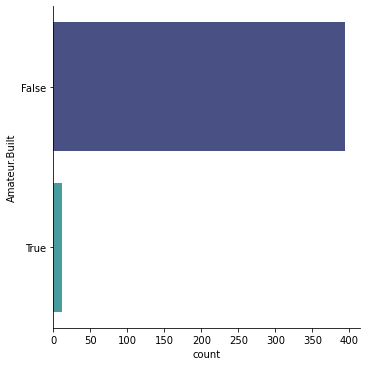

In [54]:
amateur_built_ak = ak[ak['Amateur.Built'] != 'Unknown']
sns.catplot(y ="Amateur.Built",data=amateur_built_ak , kind= "count", palette = 'mako')

<AxesSubplot:>

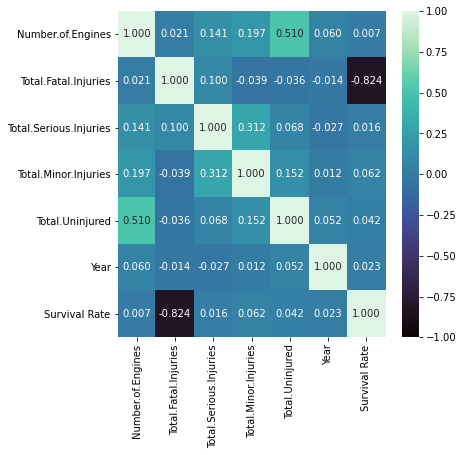

In [55]:
# Check for relation between variables.
f=plt.figure(figsize=(6,6))
sns.heatmap(ak.corr(), vmin=-1, vmax=1, annot= True, fmt=".3f" ,cmap="mako")

In [56]:
No_of_Engines= ak.groupby("Number.of.Engines").count().reset_index()
No_of_Engines

,Number.of.Engines,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,...,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State,Survival Rate
0,0.0,1,1,1,1,1,1,0,0,1,...,0,1,1,1,1,1,1,1,1,1
1,1.0,358,358,358,358,358,358,247,274,358,...,357,358,271,358,358,358,358,358,358,293
2,2.0,29,29,29,29,29,29,22,23,29,...,29,29,25,29,29,29,29,29,29,23
3,3.0,4,4,4,4,4,4,4,4,4,...,4,4,3,4,4,4,4,4,4,4
4,4.0,9,9,9,9,9,9,8,7,9,...,9,9,8,9,9,9,9,9,9,7


Total Fatalities is higher in aircrafts with 1 engine but higher total uninjuries is seen with 4 engines aircrafts.

In [57]:
factor_damage= ak.groupby("Aircraft.damage").sum().reset_index()
factor_damage

,Aircraft.damage,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Survival Rate
0,Destroyed,30.0,22.0,14.0,14.0,272.0,47728,12.65
1,Minor,6.0,0.0,2.0,7.0,106.0,7950,4.00
2,Substantial,420.0,6.0,26.0,67.0,1291.0,741433,297.00


<AxesSubplot:xlabel='Aircraft.damage', ylabel='Total.Fatal.Injuries'>

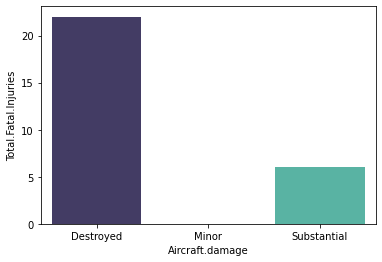

In [58]:
sns.barplot(x = 'Aircraft.damage',y='Total.Fatal.Injuries' , data = factor_damage.reset_index() , palette = 'mako')

Fatal injuries are higher when Aircraft is destroyed, and uninjured are higher in aircraft with substantial damages and so is the Survival rate.

In [59]:
df['Make'].value_counts().head(10)

Cessna      730
Piper       372
Beech       108
Boeing       58
Bell         50
Bellanca     35
Robinson     35
Maule        26
Hughes       25
Mooney       24
Name: Make, dtype: int64

<Figure size 1152x1584 with 0 Axes>

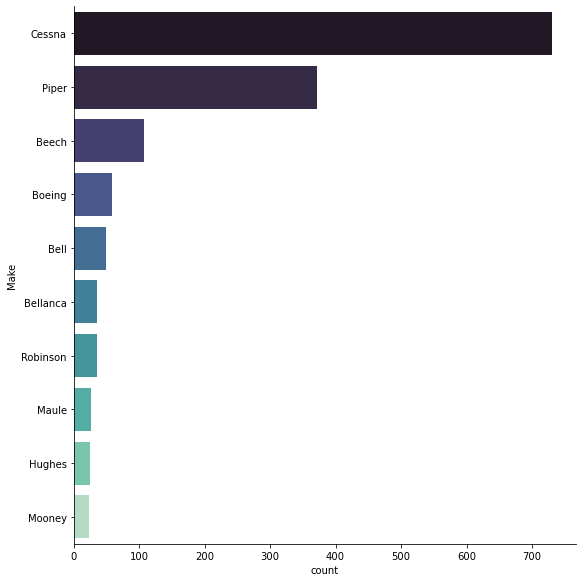

In [68]:
#Exploratory data visualisation
f = plt.figure(figsize=(16, 22))
sns.catplot(y ='Make',data=df , kind= "count",palette="mako",
           order = df["Make"].value_counts().head(10).index, height = 8)

In [61]:
factor_make= ak.groupby("Survival Rate").sum().reset_index()
factor_make

,Survival Rate,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
0,0.00,15.0,24.0,0.0,0.0,0.0,25865
1,0.25,1.0,3.0,0.0,1.0,0.0,1985
2,0.40,1.0,3.0,2.0,0.0,0.0,1996
3,1.00,362.0,0.0,37.0,78.0,1616.0,630919


In [62]:
# Survival Rate of each make in AK 
cessna =pd.DataFrame(ak[ak['Make'].str.contains("Cessna")==True])
piper =pd.DataFrame(ak[ak['Make'].str.contains("Piper")==True])
beech =pd.DataFrame(ak[ak['Make'].str.contains("Beech")==True])
boeing =pd.DataFrame(ak[ak['Make'].str.contains("Boeing")==True])
bell =pd.DataFrame(ak[ak['Make'].str.contains("Bell")==True])

print("Cessna Survival Rate: " , round((cessna["Survival Rate"].sum()/cessna["Survival Rate"].count())*100),"%")
print("Piper Survival Rate: " , round((piper["Survival Rate"].sum()/piper["Survival Rate"].count())*100),"%")
print("Beech Survival Rate: " , round((beech["Survival Rate"].sum()/beech["Survival Rate"].count())*100),"%")
print("Bell Survival Rate: " , round((bell["Survival Rate"].sum()/bell["Survival Rate"].count())*100),"%")
print("Boeing Survival Rate: " , round((boeing["Survival Rate"].sum()/boeing["Survival Rate"].count())*100),"%")

Cessna Survival Rate:  96 %
Piper Survival Rate:  97 %
Beech Survival Rate:  100 %
Bell Survival Rate:  100 %
Boeing Survival Rate:  100 %


In [63]:
engine_type_ak = ak[ak['Engine.Type'] != 'Unknown']

In [64]:
factor_eng= engine_type_ak.groupby("Engine.Type").sum().reset_index()
factor_eng

,Engine.Type,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Survival Rate
0,Reciprocating,385.0,30.0,33.0,74.0,570.0,735215,291.65
1,Turbo Fan,51.0,0.0,8.0,13.0,1234.0,29925,12.00
2,Turbo Jet,5.0,0.0,0.0,0.0,7.0,4000,1.00
3,Turbo Prop,19.0,0.0,0.0,1.0,62.0,19978,7.00
4,Turbo Shaft,4.0,3.0,4.0,0.0,3.0,8009,1.00


In [65]:
#Anchorage seems to have very high rate of accident, let's dive deeper into each factors
nak= df[df["Location"].str.contains("AK") == True ]
nak.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State,Survival Rate
105,20020917X01624,Accident,ANC82DA014,1982-01-17,"ANCHORAGE, AK",United States,MRI,MERRILL FIELD,Non-Fatal,Destroyed,...,Takeoff,Probable Cause,17-01-1983,1982,Jan,Sun,True,ANCHORAGE,AK,1.0
171,20020917X01652,Accident,ANC82FA017,1982-01-25,"ANCHORAGE, AK",United States,Z38,SKY HARBOR/O'MALLEY,Non-Fatal,Substantial,...,Descent,Probable Cause,25-01-1983,1982,Jan,Mon,False,ANCHORAGE,AK,1.0
484,20020917X01633,Accident,ANC82DA024,1982-03-05,"ANCHORAGE, AK",United States,MRI,MERRILL FIELD,Non-Fatal,Substantial,...,Landing,Probable Cause,05-03-1983,1982,Mar,Fri,False,ANCHORAGE,AK,1.0
701,20020917X01637,Accident,ANC82DA028,1982-03-27,"ANCHORAGE, AK",United States,MRI,MERRILL FIELD,Non-Fatal,Substantial,...,Landing,Probable Cause,27-03-1983,1982,Mar,Sat,True,ANCHORAGE,AK,1.0
1125,20020917X02677,Accident,ANC82DAG22,1982-05-08,"ANCHORAGE, AK",United States,IAP,ANCHORAGE,Non-Fatal,Substantial,...,Landing,Probable Cause,08-05-1983,1982,May,Sat,True,ANCHORAGE,AK,1.0
1313,20020917X02669,Accident,ANC82DAA03,1982-05-23,"FAIRBANKS, AK",United States,NaN,NaN,Non-Fatal,Substantial,...,Takeoff,Probable Cause,23-05-1983,1982,May,Sun,True,FAIRBANKS,AK,1.0
1525,20020917X02685,Accident,ANC82DAG31,1982-06-11,"ANCHORAGE, AK",United States,NaN,SAND LAKE,Non-Fatal,Substantial,...,Maneuvering,Probable Cause,11-06-1983,1982,Jun,Fri,False,ANCHORAGE,AK,1.0
1688,20020917X02708,Accident,ANC82FAA05,1982-06-23,"FAIRBANKS, AK",United States,NaN,NaN,Non-Fatal,Substantial,...,Descent,Probable Cause,23-06-1983,1982,Jun,Wed,False,FAIRBANKS,AK,1.0
1704,20020917X02709,Accident,ANC82FAA06,1982-06-25,"FAIRBANKS, AK",United States,NaN,BOUTINS STRIP,Non-Fatal,Substantial,...,Takeoff,Probable Cause,25-06-1983,1982,Jun,Fri,False,FAIRBANKS,AK,1.0
1784,20020917X02710,Accident,ANC82FAA07,1982-07-02,"FAIRBANKS, AK",United States,NaN,CHENA MARINA,Fatal,Destroyed,...,Takeoff,Probable Cause,02-07-1983,1982,Jul,Fri,False,FAIRBANKS,AK,0.0


In [66]:
weather_data_nak = nak[nak['Weather.Condition'] != 'Unknown']

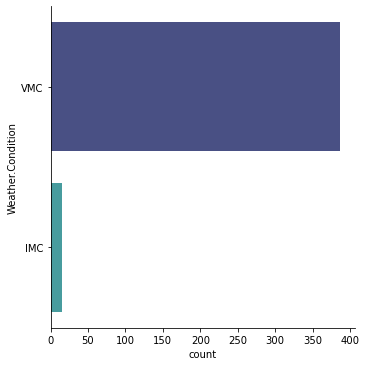

In [67]:
sns.catplot(y ="Weather.Condition",data=weather_data_ak , kind= "count", palette = 'mako')